# Advanced Data Structures and Algorithms
By Dr. [Uzay Cetin](https://uzay00.github.io/kahve/)

 - Course for CMPE 232 @ Bilgi University
 - Python Implementations of Graph Algorithms

Go to our Book's web site: https://algs4.cs.princeton.edu/lectures/

## Depth For Search

![](figures/DFS_traversal.gif)

![](https://algs4.cs.princeton.edu/lectures/demo/41DemoDepthFirstSearch.mov)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class node():
    def __init__(self, name):
        self.name = name 
        self.visited = False
        self.neighbors = []   # List of references to adjacent nodes (not node names)

In [3]:
class Graph():
    def __init__(self, edge_list):
        self.edge_list = edge_list
        self.create_nodes()
        self.create_graph() # create edges
        
    def create_nodes(self):
        # Get node names from edge_list and remove duplicates
        self.node_names = list(set([s for s,t in self.edge_list]
                                   +[t for s,t in self.edge_list]))
        # create nodes, store in a dictionary
        self.nodes = {n:node(n) for n in self.node_names}
        
    def create_graph(self):
        for edge in self.edge_list:
            self.add_edge(edge)
            
    def add_edge(self, edge):
        s,t = edge
        self.nodes[s].neighbors.append(self.nodes[t]) # in neighbor list I have nodes (not names)
        self.nodes[t].neighbors.append(self.nodes[s])

In [4]:
def draw(g, node_name = None, pos_fr = None, color = 'lightgreen', display = True):
    G = nx.Graph()
    G.add_edges_from(g.edge_list)
    
    if pos_fr: pos_fr = pos_fr
    else: pos_fr = nx.fruchterman_reingold_layout(G)
    
    marked = [name for name, node in g.nodes.items() if node.visited]
    non_marked = [name for name, node in g.nodes.items() if not node.visited]
    
    fig = plt.figure(figsize=(10,10))
    # Plot node labels
    nx.draw_networkx_labels(G, pos=pos_fr)
    # Plot nodes
    nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=marked, 
                           node_size=2000, font_size= 30, node_color='pink')
    nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=non_marked, 
                           node_size=1000, font_size= 30, node_color='lightblue')
    # Plot edges 
    nx.draw_networkx_edges(G, pos=pos_fr, width=2)
    if node_name:  plt.savefig(f'figures/iter{node_name}.png')
    if not display: plt.close(fig)
        
    return pos_fr

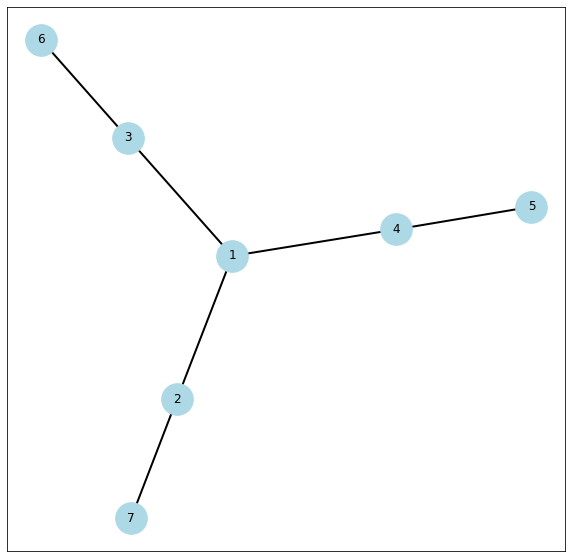

In [5]:
# list of tuples (s,t)
edge_list = [(1,2),(1,3),(1,4), (4,5), (3, 6), (2, 7)]

g = Graph(edge_list)
pos = draw(g)

# Depth - First Search

In [6]:
class DFS():   
    """
    - Mark v = Node[s_name] as visited
    - recursively visit all unmarked neighbors
    """
    def __init__(self, G):
        self.G = G
        self.traversal = []
        self.pos_fr = draw(self.G) # inital position
        
    def dfs(self, s_name):
        self.G.nodes[s_name].visited = True
        self.traversal.append(s_name)
        draw(self.G, s_name,  pos_fr = self.pos_fr, display= False) # using same position
        
        for t in self.G.nodes[s_name].neighbors: # t is node (not node name)
            if not t.visited: # all unmarked neighbors
                self.dfs(t.name) # recursive visit

[1, 2, 7, 3, 6, 4, 5]

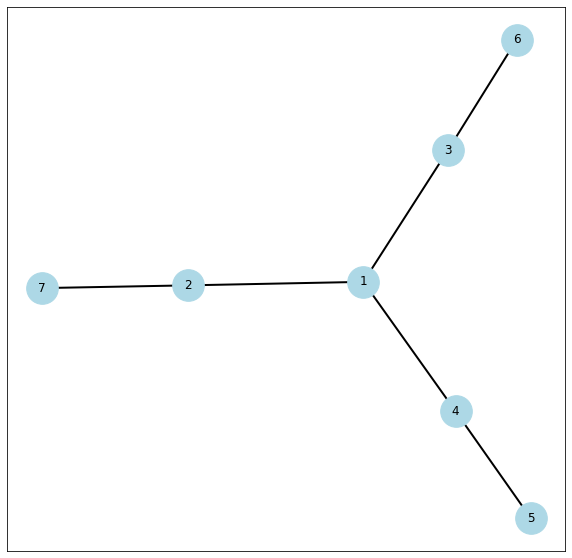

In [7]:
# list of tuples (s,t)
edge_list = [(1,2),(1,3),(1,4), (4,5), (3, 6), (2, 7)]
g = Graph(edge_list)
dfs = DFS(g);
dfs.dfs(s_name = 1);
dfs.traversal

In [8]:
from PIL import Image

filename = 'DFS_traversal'
# Create the frames
frames = []
imgs = [f'figures/iter{i}.png'for i in dfs.traversal] #glob.glob("*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save(f'figures/{filename}.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=1000, loop=0)

![](figures/DFSTT_traversal.gif)

['E', 'F', 'D', 'C', 'B', 'A']

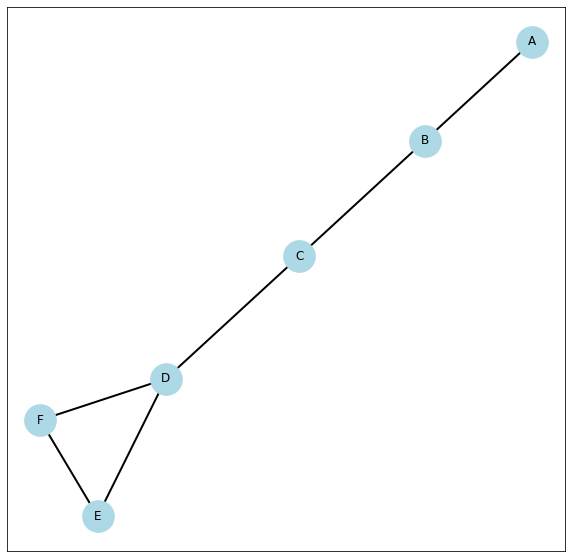

In [11]:
# list of tuples (s,t)
edge_list = [('A', 'B'), ('C', 'B'), ('C', 'D'), ('F', 'E'), ('D', 'F'),('D', 'E'),]
g = Graph(edge_list)
dfs = DFS(g);
dfs.dfs(s_name = 'E');
dfs.traversal